The idea of this notebook is to give the sum of the energy also as an input for the NN. Why shouldn't I make it easier of the network to learn when I can already give the sum as an input so that the NN only needs to learn the adjustments? I want to have the best possible result, not (as a first priority) see how well NN are learning.

In [1]:
import myfunctions as mf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time

In [2]:
# load data
rootfile = uproot.open("./stage2_clusters.root")
event = rootfile["user202302;1"]
xMC = event["x_MC"].array(library="np") #[:40000]
yMC = event["y_MC"].array(library="np") #[:40000]
EMC = event["E_MC"].array(library="np") #[:40000]
x_truth = event["x_truth"].array(library="np") #[:40000]
y_truth = event["y_truth"].array(library="np") #[:40000]
E_truth = event["E_truth"].array(library="np") #[:40000]
x_fit = event["x_fit"].array(library="np") #[:40000]
y_fit = event["y_fit"].array(library="np") #[:40000]
E_fit = event["E_fit"].array(library="np") #[:40000]

In [3]:
clustersNxN, coord, ind_del = mf.form_cluster(xMC, yMC, EMC)

This took  178.51194596290588 s


In [5]:
clusters = clustersNxN.reshape((clustersNxN.shape[0], 25))
# cut data and from trainings and test data
xMC_train, xMC_veri, yMC_train, yMC_veri, EMC_train, EMC_veri, x_truth_train, x_truth_veri, y_truth_train, y_truth_veri, E_truth_train, E_truth_veri, x_fit_veri, y_fit_veri, E_fit_veri, clusters_t, clusters_v, coord_t, coord_v = mf.training_and_validation_data(xMC, yMC, EMC, x_truth, y_truth, E_truth, x_fit, y_fit, E_fit, ind_del, clusters, coord)

# prep data
training = mf.prep_trainingsdata(x_truth_train, y_truth_train, E_truth_train, coord_t)
veri_truth_data = mf.prep_trainingsdata(x_truth_veri, y_truth_veri, E_truth_veri, coord_v)
veri_fit_data = mf.prep_trainingsdata(x_fit_veri, y_fit_veri, E_fit_veri, coord_v)

# standardize input
clusters_t = mf.standardscore(clusters_t)
clusters_v = mf.standardscore(clusters_v)

In [9]:
# insert sum as an information!
sum_t = np.sum(clusters_t, axis=1)
sum_v = np.sum(clusters_v, axis=1)
clusters_t = np.insert(clusters_t, clusters_t.shape[1] , sum_t, axis=1)
clusters_v = np.insert(clusters_v, clusters_v.shape[1] , sum_v, axis=1)

print(clusters_t.shape)

(603165, 26)


In [10]:
model1 = keras.Sequential([layers.Input(shape=(26)),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(32, activation="relu"),
                         layers.Dense(3, activation=None)])
model1.summary()
model1.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.00001))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1728      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 9

In [11]:
a = time.time()
fit_hist = model1.fit(clusters_t, training, batch_size=64, epochs=200, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/200
8482/8482 [==============================] - 9s 963us/step - loss: 537.7739 - val_loss: 20.3537
Epoch 2/200
8482/8482 [==============================] - 8s 982us/step - loss: 16.7483 - val_loss: 13.9756
Epoch 3/200
8482/8482 [==============================] - 8s 981us/step - loss: 13.3726 - val_loss: 12.1059
Epoch 4/200
8482/8482 [==============================] - 8s 983us/step - loss: 12.0866 - val_loss: 11.2445
Epoch 5/200
8482/8482 [==============================] - 9s 1ms/step - loss: 11.4512 - val_loss: 10.7951
Epoch 6/200
8482/8482 [==============================] - 9s 1ms/step - loss: 11.0833 - val_loss: 10.4788
Epoch 7/200
8482/8482 [==============================] - 9s 1ms/step - loss: 10.8335 - val_loss: 10.2681
Epoch 8/200
8482/8482 [==============================] - 9s 1ms/step - loss: 10.6358 - val_loss: 10.1077
Epoch 9/200
8482/8482 [==============================] - 9s 1ms/step - loss: 10.4826 - val_loss: 9.9666
Epoch 10/200
8482/8482 [=======================

8482/8482 [==============================] - 9s 1ms/step - loss: 9.4755 - val_loss: 9.1100
Epoch 80/200
8482/8482 [==============================] - 9s 1ms/step - loss: 9.4735 - val_loss: 9.0692
Epoch 81/200
8482/8482 [==============================] - 9s 1ms/step - loss: 9.4672 - val_loss: 9.0999
Epoch 82/200
8482/8482 [==============================] - 9s 1ms/step - loss: 9.4670 - val_loss: 9.0994
Epoch 83/200
8482/8482 [==============================] - 9s 1ms/step - loss: 9.4635 - val_loss: 9.0734
Epoch 84/200
8482/8482 [==============================] - 9s 1ms/step - loss: 9.4627 - val_loss: 9.0586
Epoch 85/200
8482/8482 [==============================] - 9s 1ms/step - loss: 9.4581 - val_loss: 9.0790
Epoch 86/200
8482/8482 [==============================] - 9s 1ms/step - loss: 9.4556 - val_loss: 9.0679
Epoch 87/200
8482/8482 [==============================] - 9s 1ms/step - loss: 9.4532 - val_loss: 9.0497
Epoch 88/200
8482/8482 [==============================] - 9s 1ms/step - loss:

8482/8482 [==============================] - 7s 846us/step - loss: 9.3047 - val_loss: 8.9182
Epoch 157/200
8482/8482 [==============================] - 7s 837us/step - loss: 9.3036 - val_loss: 8.9356
Epoch 158/200
8482/8482 [==============================] - 7s 842us/step - loss: 9.2992 - val_loss: 8.9258
Epoch 159/200
8482/8482 [==============================] - 7s 839us/step - loss: 9.2971 - val_loss: 8.9465
Epoch 160/200
8482/8482 [==============================] - 7s 842us/step - loss: 9.2970 - val_loss: 8.9102
Epoch 161/200
8482/8482 [==============================] - 7s 841us/step - loss: 9.2928 - val_loss: 8.9276
Epoch 162/200
8482/8482 [==============================] - 7s 840us/step - loss: 9.2934 - val_loss: 8.9162
Epoch 163/200
8482/8482 [==============================] - 7s 851us/step - loss: 9.2894 - val_loss: 8.9153
Epoch 164/200
8482/8482 [==============================] - 7s 863us/step - loss: 9.2856 - val_loss: 8.9225
Epoch 165/200
8482/8482 [==========================

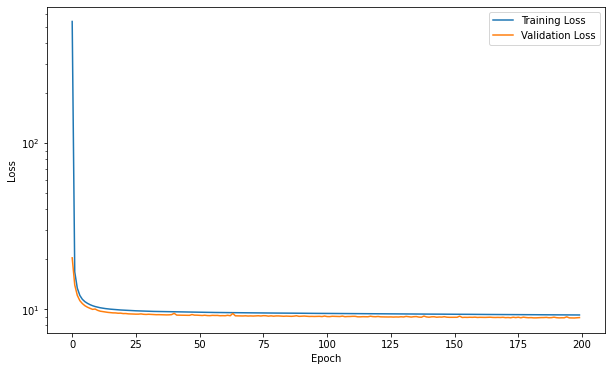

In [12]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist)

In [13]:
output = model1.predict(clusters_v)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

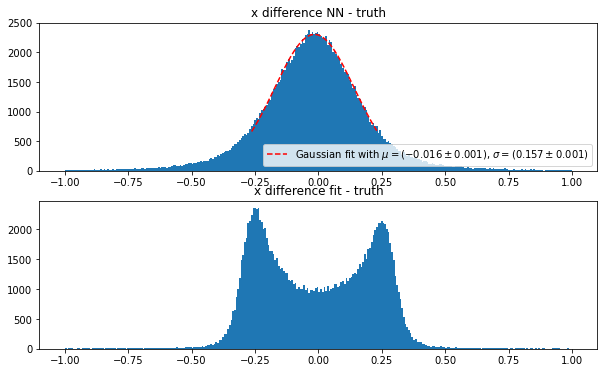

In [61]:
mf.histo_output(output.T[0], veri_fit_data.T[0], veri_truth_data.T[0], name="x", fit=True)

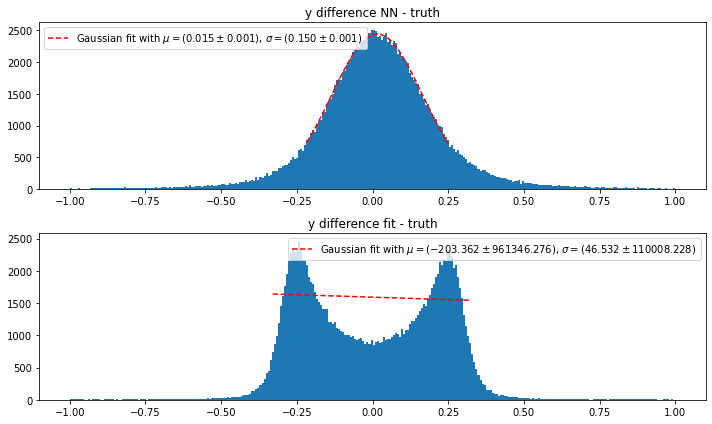

(array([1.52055563e-02, 1.50078871e-01, 9.18990072e+02]),
 array([6.83329850e-04, 9.20314928e-04, 4.51639991e+00]),
 array([-2.03362422e+02,  4.65324619e+01,  2.60668143e+09]),
 array([9.61346276e+05, 1.10008228e+05, 1.23371768e+14]))

In [18]:
mf.histo_output(output.T[1], veri_fit_data.T[1], veri_truth_data.T[1], name="y")

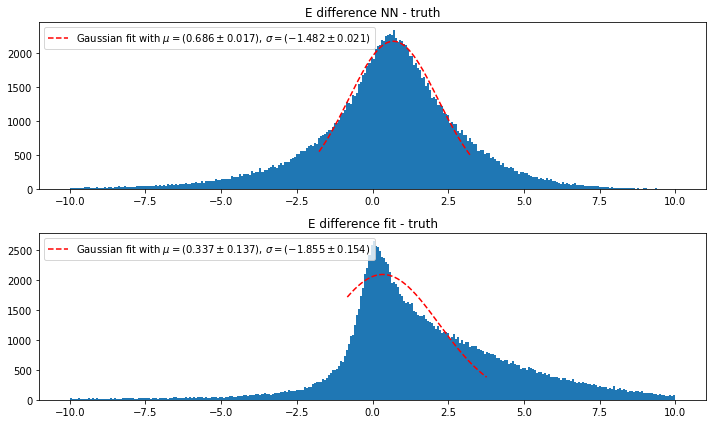

(array([ 6.86443720e-01, -1.48193224e+00,  8.09441796e+03]),
 array([1.65902915e-02, 2.08750833e-02, 9.28585193e+01]),
 array([ 3.36691567e-01, -1.85509098e+00,  9.70799030e+03]),
 array([1.37209754e-01, 1.54373648e-01, 7.36863988e+02]))

In [21]:
mf.histo_output(output.T[2], veri_fit_data.T[2], veri_truth_data.T[2], name="E", range_x=(-10,10), fit=True)

<h1> New histograms with relative differnece instead of total differnece

In [62]:

def gaus(x, mu, sigma, A):
    return (A/np.sqrt(2*np.pi * sigma**2))* np.exp(-(x-mu)**2 / (2*sigma**2))

def histo_output_rel(arr_NN, arr_fit, arr_truth, name='', figsave=False, range_x = (-1,1), bins=300, fit=True):
    '''takes output of neural network (either x,y OR E), the fit values (either x,y, OR E) and the true values of e,y or E. 
    Define with name which parameter (x,y,E) you gave as input'''
    
    plt.rcParams["figure.figsize"] = (10,6)
    plt.subplot(2,1,1)
    n_counts, bins, patches = plt.hist((arr_NN-arr_truth)/arr_truth, bins=bins, range=range_x)
    # fit
    if fit==True:
        maxv = n_counts.max()
        ind_fit = np.where(n_counts > 0.3*maxv)
        liml = ind_fit[0].min()
        limu = ind_fit[0].max() + 1

        x_centers = 0.5*(bins[:-1]+bins[1:])
        popt1, pcov1 = curve_fit(gaus, x_centers[liml:limu], n_counts[liml:limu], p0=[0,1, 100], sigma=1/np.sqrt(n_counts)[liml:limu], maxfev=10000)
        perr1 = np.sqrt(np.diag(pcov1))
        x_fit = np.linspace(x_centers[liml:limu][0], x_centers[liml:limu][-1], 500)
        y_fit = gaus(x_fit, *popt1)
        plt.plot(x_fit, y_fit, 'r--', label="Gaussian fit with " + r"$\mu = ({:.3f} \pm {:.3f})$".format(popt1[0], perr1[0]) + ", " + r"$\sigma = ({:.3f} \pm {:.3f})$".format(popt1[1], perr1[1]))
        plt.legend()
        plt.xlabel("relative difference of true and predicted value of " + name)
        plt.ylabel("counts")
        
        # which values does NN not learn correctly (energy)?
        ind_bad = np.where(abs((arr_NN-arr_truth)/arr_truth) > popt1[1]) # all events further away than 1 sigma
        values_bad = arr_NN[ind_bad]
    
    plt.subplot(2,1,2)
    n_counts, bins, patches = plt.hist((arr_fit-arr_truth)/arr_truth, bins=bins, range=range_x)

    
    if fit==True:
        # fit
        maxv = n_counts.max()
        ind_fit = np.where(n_counts > 0.3*maxv)
        liml = ind_fit[0].min()
        limu = ind_fit[0].max() + 1

        x_centers = 0.5*(bins[:-1]+bins[1:])
        popt2, pcov2 = curve_fit(gaus, x_centers[liml:limu], n_counts[liml:limu], p0=[0,1, 100], sigma=1/np.sqrt(n_counts)[liml:limu], maxfev=10000)
        perr2 = np.sqrt(np.diag(pcov2))
        x_fit = np.linspace(x_centers[liml:limu][0], x_centers[liml:limu][-1], 500)
        y_fit = gaus(x_fit, *popt2)
        plt.plot(x_fit, y_fit, 'r--', label="Gaussian fit with " + r"$\mu = ({:.3f} \pm {:.3f})$".format(popt2[0], perr2[0]) + ", " + r"$\sigma = ({:.3f} \pm {:.3f})$".format(popt2[1], perr2[1]))
        plt.legend()
        plt.xlabel("relative difference of true and coral fit value of " + name)
        plt.ylabel("counts")
    
    plt.tight_layout()
    if figsave == True:
        plt.savefig(name+"_histo.pdf")
    plt.show()
    
    if fit==True:
        #return popt1, perr1, popt2, perr2 
        return values_bad

In [63]:
from scipy.optimize import curve_fit

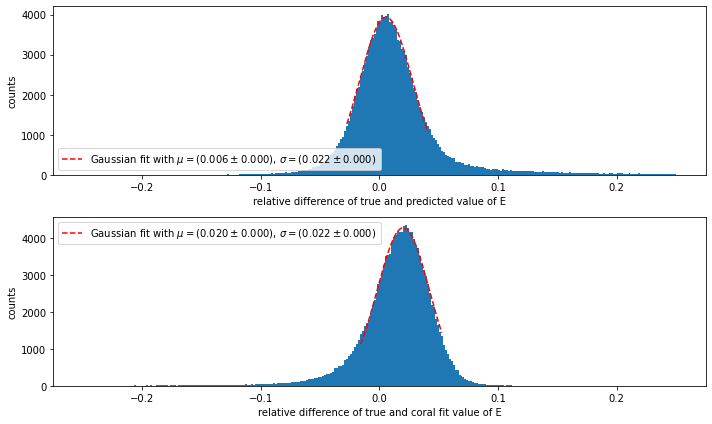

In [64]:
E_bad = histo_output_rel(output.T[2], veri_fit_data.T[2], veri_truth_data.T[2], name="E", range_x=(-0.25,0.25), fit=True)

ok but which energy values are the one that are badly learned?

(63924,) (150791,)


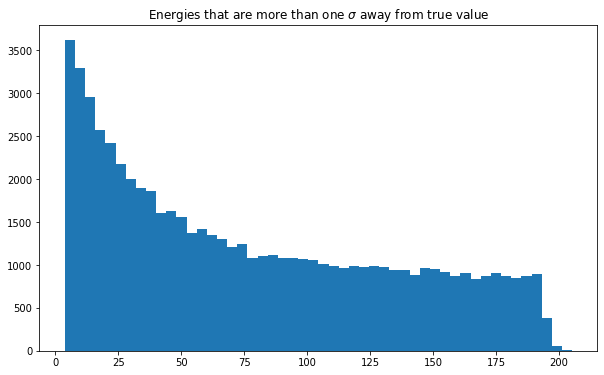

In [67]:
plt.hist(E_bad, bins=50)
plt.title("Energies that are more than one $\sigma$ away from true value")
print(E_bad.shape, output.T[2].shape)

<h2> Conclusion </h2>

Adding an additional 26th input doesn't improve much.

-> Let's implement a new loss function to learn smaller values better: mean absolut percentage error instead of mean squared error!